In [153]:
import sys

In [154]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [155]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" 
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" 
access_token = "100875722-7m5vhOzpw2LYrB7P8ISnTqtGYMMvVTqwx3X4EyJY" 
access_token_secret = "uPEymGiszhiJEVWD4Alo1pzMUJx1ymo3Fd4HWyRPRBN3r" 

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["DataWranglingDay3"]["Trump"]
col.count()

<ipython-input-155-ee32571e5fe0>:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  col.count()


16437

In [156]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=3000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        
        self.counter += 1
        
        
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
           
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Trump",""
           ]


progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)


for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Tweets collected: 0
Total tweets in collection: 16437


<ipython-input-156-2691cab47438>:55: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  print("Total tweets in collection: %s" % col.count())


In [157]:
col.find_one()

{'_id': ObjectId('5f9d0bbaed32fdf9d4a374d1'),
 'created_at': 'Sat Oct 31 07:01:08 +0000 2020',
 'id': 1322433406739755008,
 'id_str': '1322433406739755008',
 'text': 'RT @joelockhart: Let’s get this straight. 5 days before the election, two Trump judges said no counting ballots after Election Day changed…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 10839562,
  'id_str': '10839562',
  'name': 'AnnieZaidi',
  'screen_name': 'anniezaidi',
  'location': 'India',
  'url': 'http://www.anniezaidi.com',
  'description': 'Writer. Maker of short-ish films. Teacher. Books available here: https://www.amazon.in/Annie-Zaidi/e/B003XUEVOK?ref=sr_ntt_srch_lnk_1&qid=1603100605&sr=8-1',
  'translator_type': 'none',
  'protected': False,
  'verified': True,
  'fo

In [158]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)

dataset

,created_at,text,user,source,lang
0,Sat Oct 31 07:01:08 +0000 2020,RT @joelockhart: Let’s get this straight. 5 da...,@anniezaidi,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
1,Sat Oct 31 07:01:08 +0000 2020,"Thank you, @taylorswift13!!!",@EaseYourMind77,"<a href=""http://twitter.com/download/iphone"" r...",en
2,Sat Oct 31 07:01:08 +0000 2020,This is what happens when you don’t actually h...,@SchatteAndrew,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Sat Oct 31 07:01:08 +0000 2020,lol i thought bidenwas supposed to have a 17 p...,@mgkkain,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
4,Sat Oct 31 07:01:08 +0000 2020,RT @TeamTrump: First Lady Melania Trump: “We a...,@CrossLbar,"<a href=""http://twitter.com/download/android"" ...",en
...,...,...,...,...,...
16432,Sat Oct 31 07:15:18 +0000 2020,RT @momsdontrave: vote for trump or do coke\n\...,@melitzakarely,"<a href=""http://twitter.com/download/iphone"" r...",en
16433,Sat Oct 31 07:15:18 +0000 2020,"RT @EM_RESUS: Hi ER Doc here,\n\nI can’t belie...",@missellielopez,"<a href=""http://twitter.com/download/iphone"" r...",en
16434,Sat Oct 31 07:15:18 +0000 2020,👏👏🇬🇧🇺🇸🏴󠁧󠁢󠁳󠁣󠁴󠁿🇪🇺,@GoranMarkovic20,"<a href=""http://twitter.com/#!/download/ipad"" ...",und
16435,Sat Oct 31 07:15:18 +0000 2020,????,@OpenAmerica_PAC,"<a href=""http://twitter.com/download/android"" ...",und


In [159]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,11276
1,trump,10443
2,the,8354
3,to,5807
4,https,5672
5,co,5612
6,and,4222
7,is,4165
8,of,3951
9,in,3637


<ipython-input-160-a8481ec67a37>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.source_name = dataset.source.apply(get_source_name)


dlvr.it                   19
Twitterrific for iOS      28
Tweetbot for iΟS          28
WordPress.com             39
TweetDeck                 47
IFTTT                    361
Twitter for iPad         990
Twitter Web App         3527
Twitter for Android     4924
Twitter for iPhone      6221
Name: source, dtype: int64

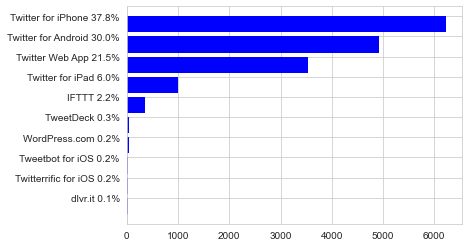

In [160]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

pl        38
ja        41
pt        50
nl        57
de        79
it        83
fr       252
es       294
und      682
en     14587
Name: lang, dtype: int64

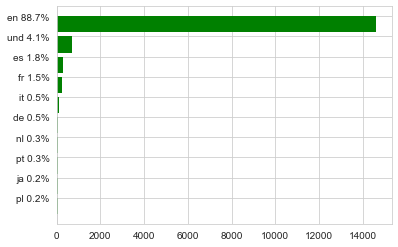

In [161]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [162]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [163]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)

is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1322433406739755008,RT @joelockhart: Let’s get this straight. 5 da...,en
1,1322433406794346496,"Thank you, @taylorswift13!!!",en
2,1322433406848901125,This is what happens when you don’t actually h...,en
3,1322433406739820545,lol i thought bidenwas supposed to have a 17 p...,en
4,1322433407113031680,RT @TeamTrump: First Lady Melania Trump: “We a...,en
...,...,...,...
16430,1322436972074422273,RT @th3j35t3r: I'd like to see Trump revoke Se...,en
16431,1322436972225310720,RT @thejtlewis: It’s cool to support Trump!,en
16432,1322436972221100032,RT @momsdontrave: vote for trump or do coke\n\...,en
16433,1322436972372086784,"RT @EM_RESUS: Hi ER Doc here,\n\nI can’t belie...",en


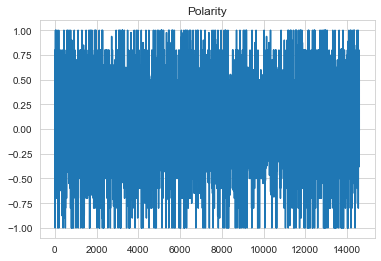

In [164]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

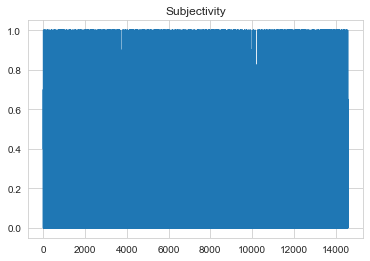

In [165]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [166]:
import statistics
statistics.mean(poltweet.polarity)

0.05891699902383606

In [167]:
import statistics
statistics.mean(poltweet.subjectivity)

0.3559282142312238

In [168]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [169]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100


a = dataset1['text'].str.lower().str.cat(sep=' ')


b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


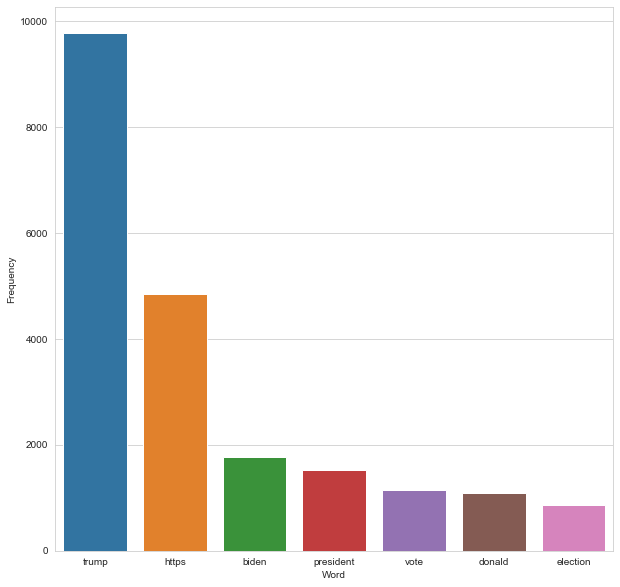

In [170]:
import seaborn as sns
 
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        


word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

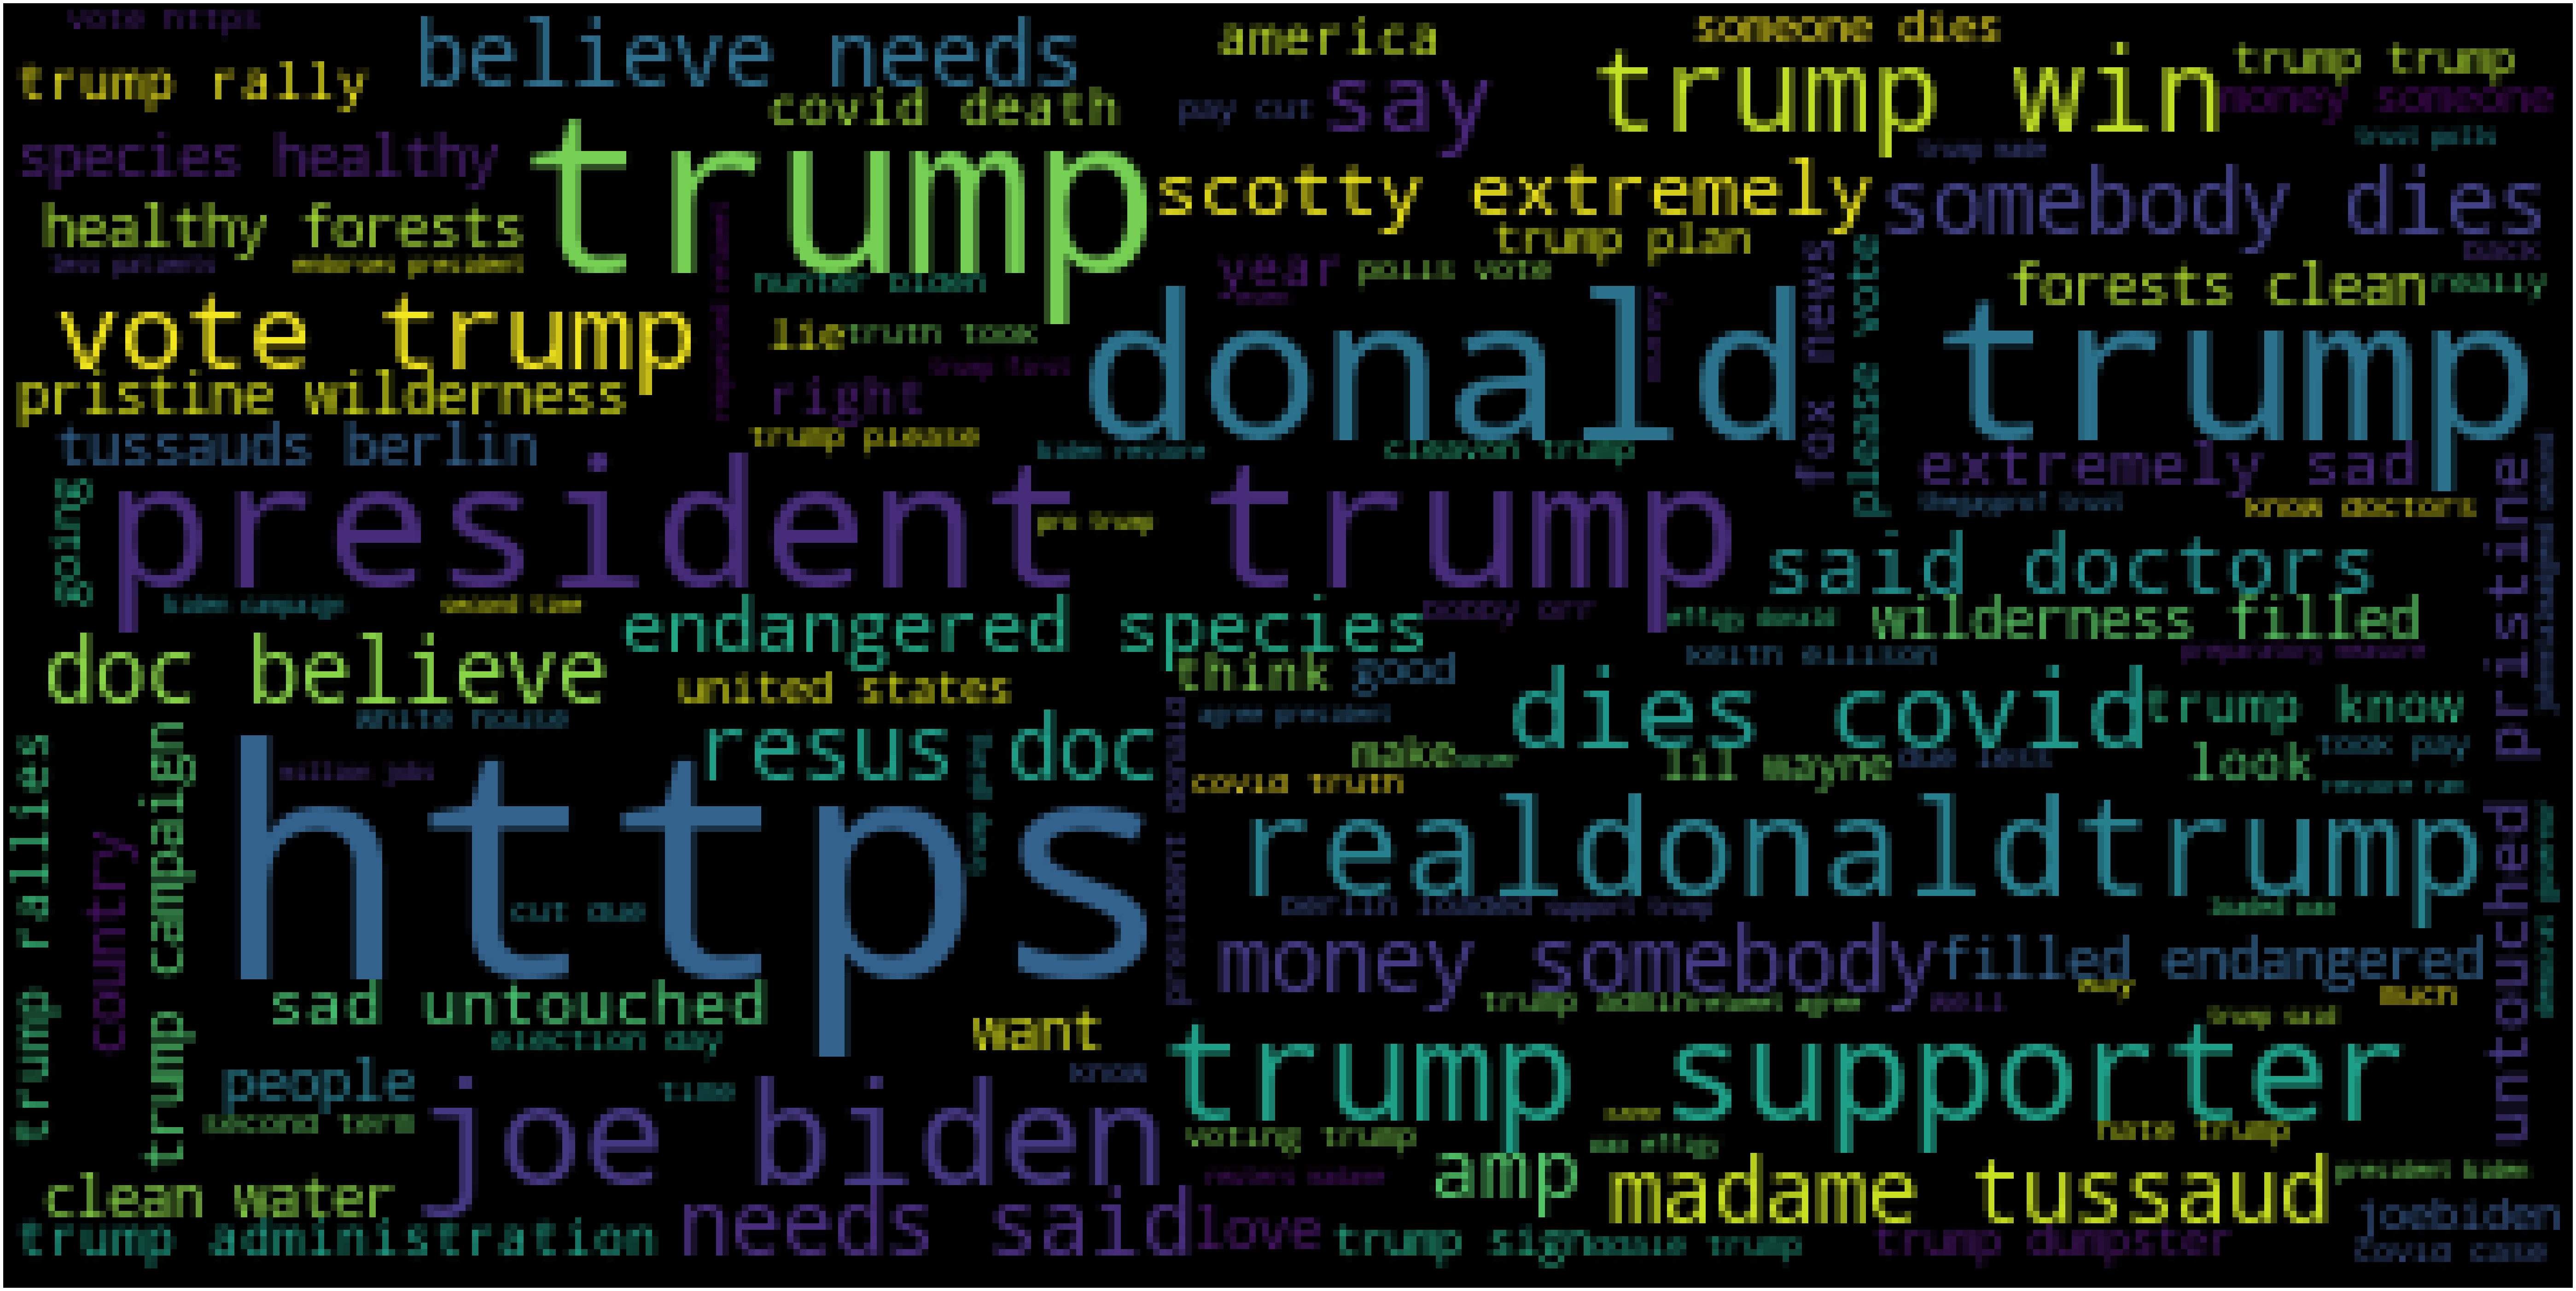

In [171]:
wc(cleaned_data_title,'black','Common Words' )

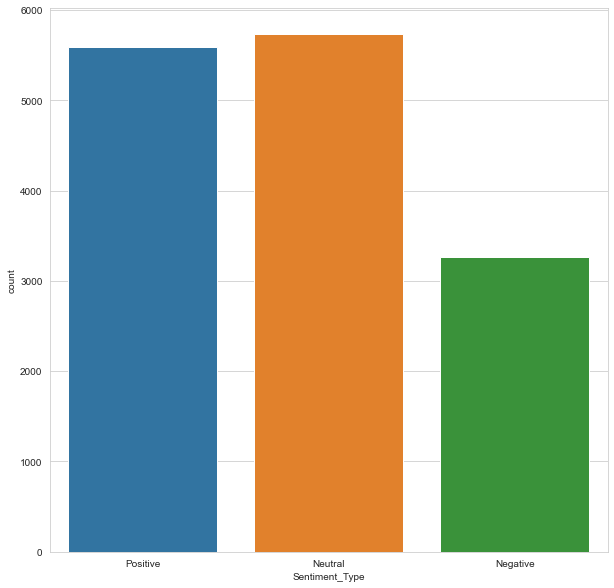

In [172]:
from textblob import TextBlob

bloblist_desc = list()

twit=dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [173]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'57.97'